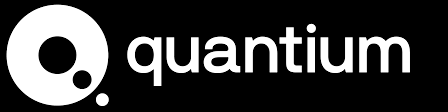

# **QUANTIUM DATA SET SUBMISSION**



## **Importing Necessary libraries**

In [130]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as myplot

# **Mounting drive**

In [131]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Reading the transaction chip data first**

In [132]:
fold=pd.read_excel('/content/drive/MyDrive/QUANTIUM/QVI_transaction_data.xlsx')         #Reading data
fold.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt 175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [133]:
fold.isnull().sum()     #no NULL values

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [134]:
fold.dtypes   # To return datatypes 

DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object

In [135]:
fold['PROD_NAME'].unique()[:25]            #Reading the first 25 unique PROD_NAMEs of the data  

array(['Natural Chip        Compny SeaSalt 175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', '

In [136]:
with_salsa=fold[fold['PROD_NAME'].str.contains('salsa',case=False)]['PROD_NAME'].unique()
#some PROD_NAMEs have salsa in their respective names but salsa is also a flavour 
#So, the list of names having salsa as a subname have to be listed and then removed in order to avoid confusion further.
with_salsa 

array(['Old El Paso Salsa   Dip Tomato Mild 300g',
       'Red Rock Deli SR    Salsa & Mzzrlla 150g',
       'Smiths Crinkle Cut  Tomato Salsa 150g',
       'Doritos Salsa       Medium 300g',
       'Old El Paso Salsa   Dip Chnky Tom Ht 300g',
       'Woolworths Mild     Salsa 300g',
       'Old El Paso Salsa   Dip Tomato Med 300g',
       'Woolworths Medium   Salsa 300g',
       'Old El Paso Salsa   Dip Chnky Tom Ht300g',
       'Doritos Salsa Mild  300g'], dtype=object)

In [137]:
salsa_word=fold.index[fold['PROD_NAME'].str.contains('salsa',case=False) & (fold['PROD_NAME'].str.contains('Old',case=False) | fold['PROD_NAME'].str.contains('Woolworths',case=False) )]

In [138]:
#Old El Paso Salsa and Woolworths Medium  /Mild  are the examples of such words.
salsa_word

Int64Index([     5,     25,     71,     74,     87,    114,    131,    158,
               178,    207,
            ...
            264551, 264554, 264594, 264607, 264615, 264628, 264640, 264643,
            264675, 264678],
           dtype='int64', length=12245)

In [139]:
fold_off_salsa=fold.drop(salsa_word,axis=0)     #dropping those entries by column (axis=0)
fold_off_salsa.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt 175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [140]:
fold_off_salsa['BRAND_NAME']=fold_off_salsa['PROD_NAME'].apply(lambda a:a.strip().split()[0])
 #accessing the first main name of the PROD_NAME company through indexing and representing them in a new column as a respective BRAND NAME.

In [141]:
fold_off_salsa.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND_NAME
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt 175g,2,6.0,Natural
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle


In [142]:
def extract_size(x): #Function to get the weight/size of each listed Chip packet and allocating a new column in the data to it in order to analyze better.
    size=[]
    for i in x:
        if i.isdigit():
            size.append(i)
    return "".join(size)

In [143]:
fold_off_salsa['PACK_SIZE']=fold_off_salsa['PROD_NAME'].apply(lambda x:extract_size(x)) 

In [144]:
fold_off_salsa.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND_NAME,PACK_SIZE
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt 175g,2,6.0,Natural,175
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs,175
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths,170
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths,175
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle,150


In [145]:
fold_off_salsa.describe() #describe to get the full information like below and also to find the sudden increase/decrease of the values in order to trase the outliers if needed.

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,252591.000000,252591.000000,2.525910e+05,2.525910e+05,252591.000000,252591.000000,252591.000000
mean,43464.073629,135.069805,1.355420e+05,1.351490e+05,56.461616,1.907416,7.266076
std,105.397396,76.757270,8.059796e+04,7.811141e+04,33.525777,0.654648,3.066758
min,43282.000000,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,43373.000000,70.000000,7.002700e+04,6.764550e+04,27.000000,2.000000,5.400000
50%,43464.000000,130.000000,1.303610e+05,1.351530e+05,53.000000,2.000000,7.400000
75%,43555.000000,203.000000,2.030800e+05,2.026345e+05,87.000000,2.000000,8.800000
max,43646.000000,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [146]:
#Using datetime library to convert the date in the standard format 
from datetime import datetime 
def convert_to_datetime(n):
    dt = datetime.fromordinal(datetime(1900,1,1).toordinal() + n - 2)
    return dt

#Convert dates to form YYYY-MM-DD
fold_off_salsa['DATE'] = fold_off_salsa['DATE'].apply(convert_to_datetime)
fold_off_salsa.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND_NAME,PACK_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt 175g,2,6.0,Natural,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle,150


In [147]:
fold_off_salsa.dtypes

DATE              datetime64[ns]
STORE_NBR                  int64
LYLTY_CARD_NBR             int64
TXN_ID                     int64
PROD_NBR                   int64
PROD_NAME                 object
PROD_QTY                   int64
TOT_SALES                float64
BRAND_NAME                object
PACK_SIZE                 object
dtype: object

In [148]:
new_data=fold_off_salsa        #Renaming the fold_off_salsa into new_data in order to have  a name simpler and short.

In [149]:
new_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND_NAME,PACK_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt 175g,2,6.0,Natural,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle,150


In [150]:
#Calculating Unit_Price for each entry and loading them to other new column for better analysis and plots.
new_data['UNIT_PRICE']=new_data['TOT_SALES']/new_data['PROD_QTY'] 

In [151]:
new_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND_NAME,PACK_SIZE,UNIT_PRICE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt 175g,2,6.0,Natural,175,3.00
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs,175,2.10
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths,170,1.45
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths,175,3.00
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle,150,4.60


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


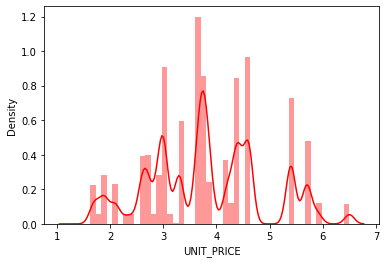

In [152]:
sns.distplot(new_data['UNIT_PRICE'],color='red')

In [153]:
new_data['D_MONTH']=new_data['DATE'].dt.month     #Extracting the month ,year and date from the date column
new_data['D_YEAR']=new_data['DATE'].dt.year
new_data['D_DAY']=new_data['DATE'].dt.day

In [154]:
list={1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}   #Simple Converting the month number to monh name using map
new_data['D_MONTH_NAME']=new_data['D_MONTH'].map(list)

In [155]:
new_data=new_data.drop('D_MONTH',axis=1)  #dropping uncessary month number column now

In [156]:
new_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND_NAME,PACK_SIZE,UNIT_PRICE,D_YEAR,D_DAY,D_MONTH_NAME
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt 175g,2,6.0,Natural,175,3.00,2018,17,Oct
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs,175,2.10,2019,14,May
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths,170,1.45,2019,20,May
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths,175,3.00,2018,17,Aug
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle,150,4.60,2018,18,Aug


In [157]:
new_data.shape

(252591, 14)

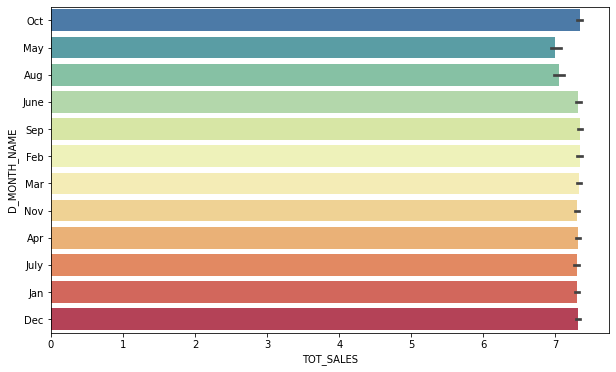

In [158]:
myplot.figure(figsize=(10,6))               #Bar Plot 
ax = sns.barplot(y="D_MONTH_NAME", x="TOT_SALES", data=new_data,palette="Spectral_r")

**The above bar plot is between the months and the total sales of the chips ,through this plot we can say that the month type really doesn't affect the sale of chips though according to the plot the sales were least in the month of may and august.**

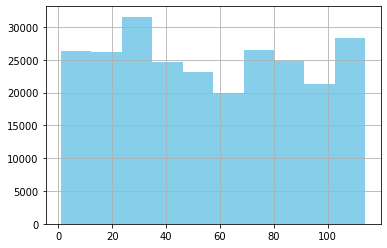

In [192]:
new_data['PROD_NBR'].hist(color="skyblue")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'TRANSACTIONS')

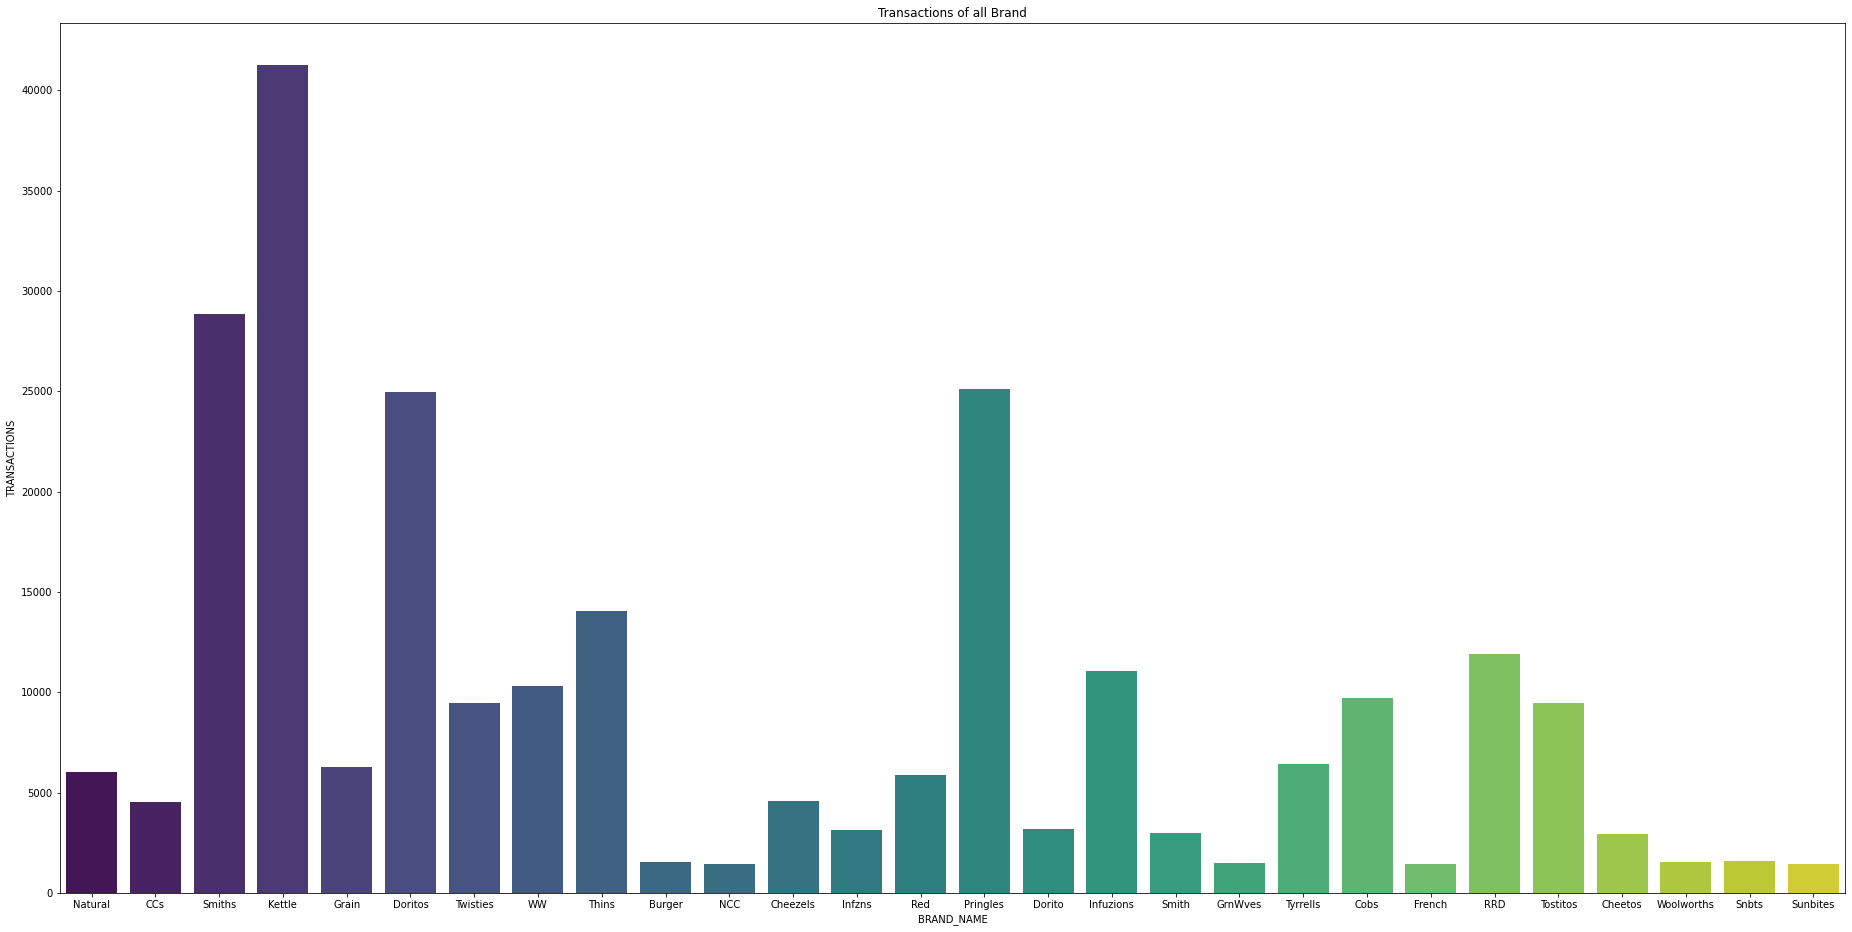

In [160]:
fig,ax=myplot.subplots(figsize=(32,16))
sns.countplot(new_data['BRAND_NAME'],palette='viridis')
myplot.title("Transactions of all Brand")
myplot.ylabel("TRANSACTIONS")

The above Plot is a CountPlot  of BRAND_NAMEs giving their contibution towards the total transaction.
Clearly, Kettle has the maximum contribution.
NCC has least in the given data as shown in the plot.

The below average performers i.e. the companies who have sells less than 50 % are more in the data and few companies are top performers 
due to better taste(flavour) ,pack_size and affodability 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


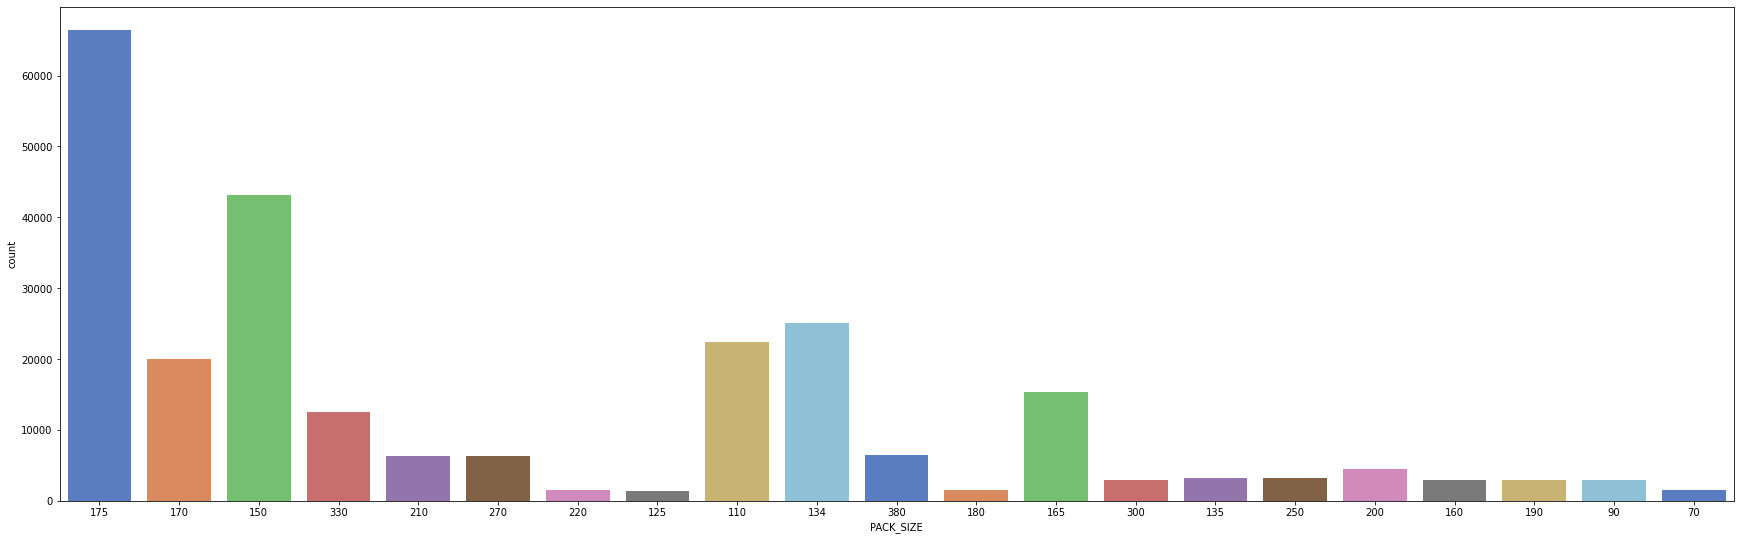

In [161]:
fig,ax=myplot.subplots(figsize=(30,20))
myplot.subplot(2,1,1)
sns.countplot(new_data['PACK_SIZE'],palette="muted")

From the above plot ,It  is clear that the pack_size of 175 g is maximun sold  i.e, It has sufficient quantity to satisfy one person once bought
and the packs of 220g , 125g , 70g are least sold.

**PURCHASE BEHAVIOR DATA**

In [162]:
mydata=pd.read_csv('/content/drive/MyDrive/QUANTIUM/QVI_purchase_behaviour.csv')
mydata.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [163]:
mydata['PREMIUM_CUSTOMER'].unique()   #To extract unique values in the column

array(['Premium', 'Mainstream', 'Budget'], dtype=object)

In [164]:
mydata['LIFESTAGE'].unique()     #To extract unique values in the column

array(['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'OLDER SINGLES/COUPLES',
       'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'RETIREES'], dtype=object)

In [165]:
mydata.dtypes

LYLTY_CARD_NBR       int64
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object

In [166]:
mydata.isnull().sum()    #no NULL values

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

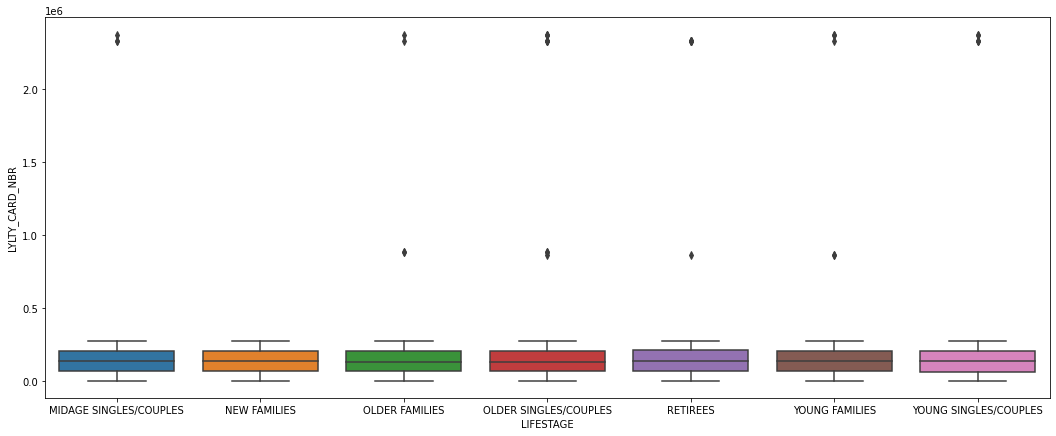

In [167]:
myplot.figure(figsize=(18,7))
sns.boxplot(x='LIFESTAGE',y='LYLTY_CARD_NBR',data=mydata.sort_values('LIFESTAGE',ascending=True))

In [168]:
mydata.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


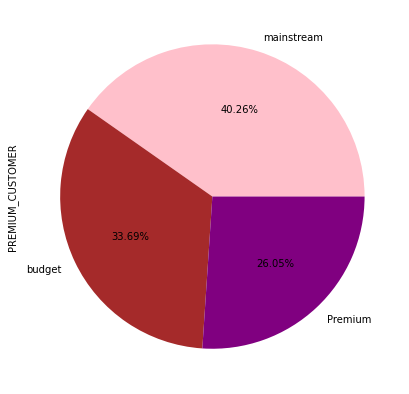

In [169]:
fig = myplot.subplots(figsize=(10,7))
label=['mainstream','budget','Premium']
fbcolor=["pink","brown","purple"]
mydata['PREMIUM_CUSTOMER'].value_counts().plot.pie(labels=label,autopct='%1.2f%%',colors=fbcolor)

The above plot  is a Pie chart  of PREMIUM_CUSTOMER column 
It has 3 categories and the maximum customers are mainstream and less than 30% have taken the Premium .


In [170]:
data1=pd.get_dummies(data=mydata['LIFESTAGE'])
data1.head()

,MIDAGE SINGLES/COUPLES,NEW FAMILIES,OLDER FAMILIES,OLDER SINGLES/COUPLES,RETIREES,YOUNG FAMILIES,YOUNG SINGLES/COUPLES
0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1
2,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0


In [171]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
mydata['PREMIUM_CUSTOMER']=encoder.fit_transform(mydata['PREMIUM_CUSTOMER'])

In [172]:
mydata.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,2
1,1002,YOUNG SINGLES/COUPLES,1
2,1003,YOUNG FAMILIES,0
3,1004,OLDER SINGLES/COUPLES,1
4,1005,MIDAGE SINGLES/COUPLES,1


In [173]:
data=pd.concat([mydata,data1],axis=1)

In [174]:
pd.set_option('display.max_columns', None)
data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,MIDAGE SINGLES/COUPLES,NEW FAMILIES,OLDER FAMILIES,OLDER SINGLES/COUPLES,RETIREES,YOUNG FAMILIES,YOUNG SINGLES/COUPLES
0,1000,YOUNG SINGLES/COUPLES,2,0,0,0,0,0,0,1
1,1002,YOUNG SINGLES/COUPLES,1,0,0,0,0,0,0,1
2,1003,YOUNG FAMILIES,0,0,0,0,0,0,1,0
3,1004,OLDER SINGLES/COUPLES,1,0,0,0,1,0,0,0
4,1005,MIDAGE SINGLES/COUPLES,1,1,0,0,0,0,0,0


In [175]:
data=data.drop('LIFESTAGE',axis=1)

In [176]:
data.head()   #clean data 

,LYLTY_CARD_NBR,PREMIUM_CUSTOMER,MIDAGE SINGLES/COUPLES,NEW FAMILIES,OLDER FAMILIES,OLDER SINGLES/COUPLES,RETIREES,YOUNG FAMILIES,YOUNG SINGLES/COUPLES
0,1000,2,0,0,0,0,0,0,1
1,1002,1,0,0,0,0,0,0,1
2,1003,0,0,0,0,0,0,1,0
3,1004,1,0,0,0,1,0,0,0
4,1005,1,1,0,0,0,0,0,0


In [177]:
final_data=pd.concat([new_data,data],axis=1)    #Mergeing the 2 datasets 

In [178]:
final_data.head()  #Named as final_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND_NAME,PACK_SIZE,UNIT_PRICE,D_YEAR,D_DAY,D_MONTH_NAME,LYLTY_CARD_NBR,PREMIUM_CUSTOMER,MIDAGE SINGLES/COUPLES,NEW FAMILIES,OLDER FAMILIES,OLDER SINGLES/COUPLES,RETIREES,YOUNG FAMILIES,YOUNG SINGLES/COUPLES
0,2018-10-17,1.0,1000.0,1.0,5.0,Natural Chip Compny SeaSalt 175g,2.0,6.0,Natural,175,3.00,2018.0,17.0,Oct,1000.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2019-05-14,1.0,1307.0,348.0,66.0,CCs Nacho Cheese 175g,3.0,6.3,CCs,175,2.10,2019.0,14.0,May,1002.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2019-05-20,1.0,1343.0,383.0,61.0,Smiths Crinkle Cut Chips Chicken 170g,2.0,2.9,Smiths,170,1.45,2019.0,20.0,May,1003.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2018-08-17,2.0,2373.0,974.0,69.0,Smiths Chip Thinly S/Cream&Onion 175g,5.0,15.0,Smiths,175,3.00,2018.0,17.0,Aug,1004.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2018-08-18,2.0,2426.0,1038.0,108.0,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3.0,13.8,Kettle,150,4.60,2018.0,18.0,Aug,1005.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [182]:
final_data=final_data.drop('DATE',axis=1)

In [183]:
final_data=final_data.drop('PROD_NAME',axis=1)

In [184]:
final_data.head()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,BRAND_NAME,PACK_SIZE,UNIT_PRICE,D_YEAR,D_DAY,D_MONTH_NAME,LYLTY_CARD_NBR,PREMIUM_CUSTOMER,MIDAGE SINGLES/COUPLES,NEW FAMILIES,OLDER FAMILIES,OLDER SINGLES/COUPLES,RETIREES,YOUNG FAMILIES,YOUNG SINGLES/COUPLES
0,1.0,1000.0,1.0,5.0,2.0,6.0,Natural,175,3.00,2018.0,17.0,Oct,1000.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,1307.0,348.0,66.0,3.0,6.3,CCs,175,2.10,2019.0,14.0,May,1002.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,1343.0,383.0,61.0,2.0,2.9,Smiths,170,1.45,2019.0,20.0,May,1003.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2.0,2373.0,974.0,69.0,5.0,15.0,Smiths,175,3.00,2018.0,17.0,Aug,1004.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2.0,2426.0,1038.0,108.0,3.0,13.8,Kettle,150,4.60,2018.0,18.0,Aug,1005.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


Our final data has all numeric values excluding MONTH_NAME and PROD_NAME columns ,we have already extracted the month number in the upper section using datetime module and in case of PROD_NAME column we can use get_dummies function in order to make it appropriate for the computer to read and analyse if required.

# **Submission by- PURVI BHOYAR**
# **Platform used- GOOGLE COLAB**

# **THANK YOU**
